In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns 

In [2]:
df = pd.read_excel("StudentPerformanceSet.xls")


In [3]:
print(df) 

     Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com    Male   19   
4996      S5996       Emma     Brown  student4996@university.com    Male   19   
4997      S5997       John     Brown  student4997@university.com  Female   24   
4998      S5998       Sara     Davis  student4998@university.com    Male   23   
4999      S5999      Maria     Brown  student4999@university.com  Female   21   

       Department  Attendan

In [4]:
df = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email', 
                      'Gender', 'Age', 'Department', 'Family_Income_Level'])

In [5]:
print(df)

      Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
0              97.36          40.61        59.61            73.69   
1              97.71          57.27        74.00            74.23   
2              99.52          41.84        63.85            85.85   
3              90.38          45.65        44.44            68.10   
4              59.41          53.13        61.77            67.66   
...              ...            ...          ...              ...   
4995           96.09          45.86        45.63            74.13   
4996           96.30          78.67        47.42            57.89   
4997           89.94          50.84        65.83            84.69   
4998           99.09          55.44        57.45            78.78   
4999           90.33          93.29        88.42            87.06   

      Quizzes_Avg  Participation_Score  Projects_Score  Total_Score Grade  \
0           53.17                 73.4           62.84      59.8865     F   
1           98.23

In [6]:
df = df.dropna() 

In [7]:
print(df)

      Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
0              97.36          40.61        59.61            73.69   
1              97.71          57.27        74.00            74.23   
2              99.52          41.84        63.85            85.85   
3              90.38          45.65        44.44            68.10   
4              59.41          53.13        61.77            67.66   
...              ...            ...          ...              ...   
4993           50.82          53.45        98.33            61.35   
4994           62.57          58.18        42.62            56.41   
4995           96.09          45.86        45.63            74.13   
4998           99.09          55.44        57.45            78.78   
4999           90.33          93.29        88.42            87.06   

      Quizzes_Avg  Participation_Score  Projects_Score  Total_Score Grade  \
0           53.17                 73.4           62.84      59.8865     F   
1           98.23

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Attendance (%)              3975 non-null   float64
 1   Midterm_Score               3975 non-null   float64
 2   Final_Score                 3975 non-null   float64
 3   Assignments_Avg             3975 non-null   float64
 4   Quizzes_Avg                 3975 non-null   float64
 5   Participation_Score         3975 non-null   float64
 6   Projects_Score              3975 non-null   float64
 7   Total_Score                 3975 non-null   float64
 8   Grade                       3975 non-null   object 
 9   Study_Hours_per_Week        3975 non-null   float64
 10  Extracurricular_Activities  3975 non-null   object 
 11  Internet_Access_at_Home     3975 non-null   object 
 12  Parent_Education_Level      3975 non-null   object 
 13  Stress_Level (1-10)         3975 non-n

In [9]:
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])
df['Extracurricular_Activities'] = le.fit_transform(df['Extracurricular_Activities'])
df['Internet_Access_at_Home'] = le.fit_transform(df['Internet_Access_at_Home'])
df['Parent_Education_Level'] = le.fit_transform(df['Parent_Education_Level'])

In [10]:
print(df)

      Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
0              97.36          40.61        59.61            73.69   
1              97.71          57.27        74.00            74.23   
2              99.52          41.84        63.85            85.85   
3              90.38          45.65        44.44            68.10   
4              59.41          53.13        61.77            67.66   
...              ...            ...          ...              ...   
4993           50.82          53.45        98.33            61.35   
4994           62.57          58.18        42.62            56.41   
4995           96.09          45.86        45.63            74.13   
4998           99.09          55.44        57.45            78.78   
4999           90.33          93.29        88.42            87.06   

      Quizzes_Avg  Participation_Score  Projects_Score  Total_Score  Grade  \
0           53.17                 73.4           62.84      59.8865      4   
1           98.

In [11]:
X = df.drop(columns=['Grade'])
y = df['Grade']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9949685534591195

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.97      1.00      0.99       110
           2       1.00      1.00      1.00       363
           3       1.00      1.00      1.00       274
           4       1.00      1.00      1.00        44

    accuracy                           0.99       795
   macro avg       0.99      0.85      0.88       795
weighted avg       1.00      0.99      0.99       795



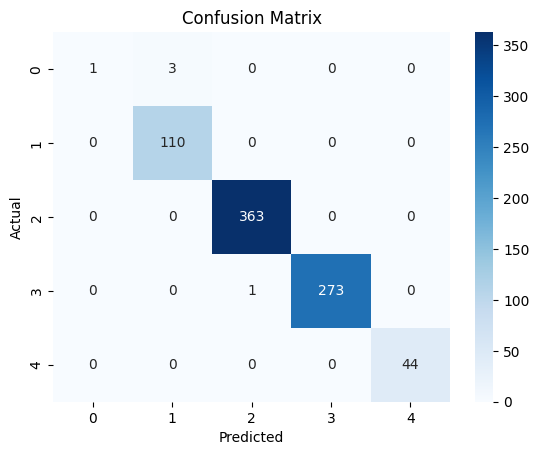

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

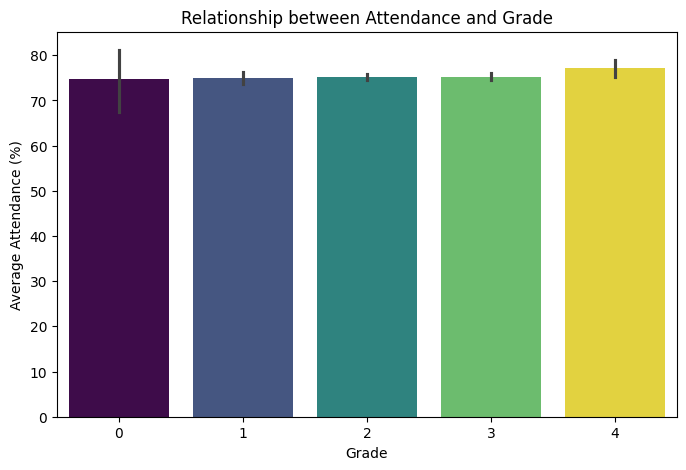

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Grade', y='Attendance (%)', hue='Grade', data=df, palette='viridis', legend=False)
plt.title("Relationship between Attendance and Grade")
plt.xlabel("Grade")
plt.ylabel("Average Attendance (%)")
plt.show()

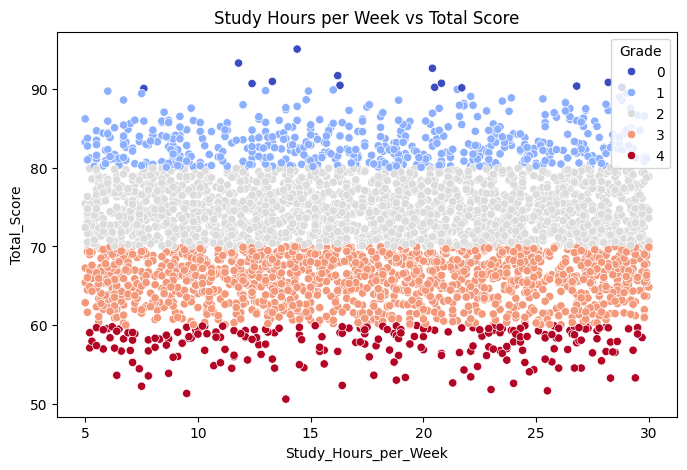

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', hue='Grade', data=df, palette='coolwarm')
plt.title("Study Hours per Week vs Total Score")
plt.show()

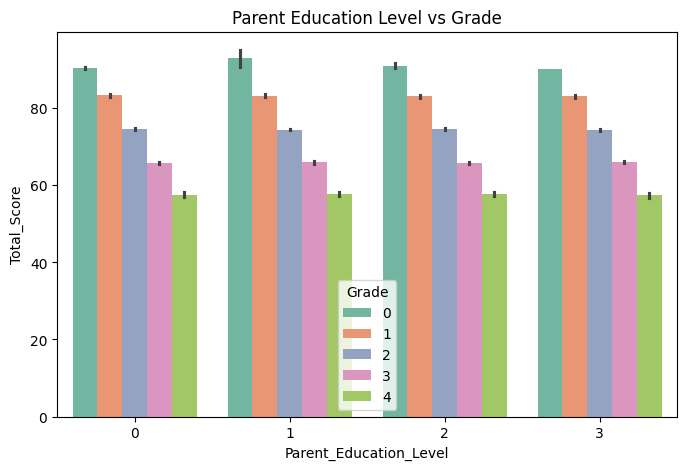

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='Parent_Education_Level', y='Total_Score', hue='Grade', data=df, palette='Set2')
plt.title("Parent Education Level vs Grade")
plt.show()

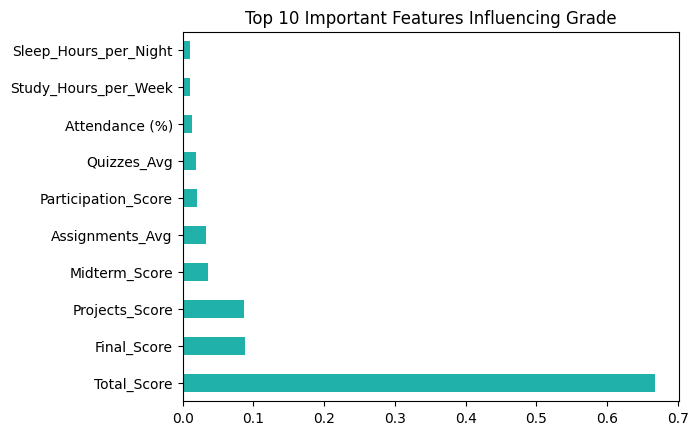

In [20]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh', color='lightseagreen')
plt.title('Top 10 Important Features Influencing Grade')
plt.show()

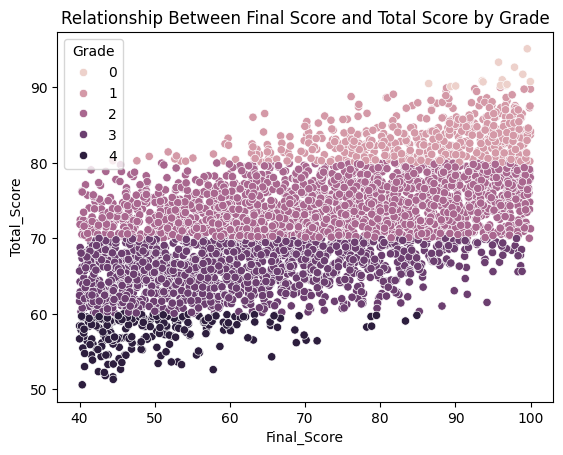

In [21]:
sns.scatterplot(x='Final_Score', y='Total_Score', hue='Grade', data=df)
plt.title("Relationship Between Final Score and Total Score by Grade")
plt.show()

In [ ]:
grade_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E'
}
def predict_grade_user():
    print("\nEnter the student details below:")
    new_data = {
        'Attendance (%)': float(input("Attendance (%): ")),
        'Midterm_Score': float(input("Midterm Score: ")),
        'Final_Score': float(input("Final Score: ")),
        'Assignments_Avg': float(input("Assignments Average: ")),
        'Quizzes_Avg': float(input("Quizzes Average: ")),
        'Participation_Score': float(input("Participation Score: ")),
        'Projects_Score': float(input("Projects Score: ")),
        'Total_Score': float(input("Total Score: ")),
        'Study_Hours_per_Week': float(input("Study Hours per Week: ")),
        'Extracurricular_Activities': int(input("Extracurricular Activities (0 = No, 1 = Yes): ")),
        'Internet_Access_at_Home': int(input("Internet Access at Home (0 = No, 1 = Yes): ")),
        'Parent_Education_Level': int(input("Parent Education Level (0=Low, 1=Medium, 2=High): ")),
        'Stress_Level (1-10)': float(input("Stress Level (1-10): ")),
        'Sleep_Hours_per_Night': float(input("Sleep Hours per Night: "))
    }
    df_new = pd.DataFrame([new_data])
    df_new_scaled = scaler.transform(df_new)
    prediction = model.predict(df_new_scaled)

    prediction = np.round(prediction).astype(int)
    predicted_grade = grade_mapping.get(int(prediction[0]), "Unknown")

    print("\nPredicted Grade:", predicted_grade)

predict_grade_user() 


Enter the student details below:
